In [1]:
import pandas as pd
import numpy as np

In [2]:
rng = pd.date_range('2000-01-10', periods = 100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-10   -1.130211
2000-01-11    1.479933
2000-01-12    0.186592
2000-01-13   -0.766140
2000-01-14   -1.071258
                ...   
2000-04-14   -0.903138
2000-04-15    1.472557
2000-04-16   -0.051784
2000-04-17   -0.906665
2000-04-18   -0.057240
Freq: D, Length: 100, dtype: float64

In [4]:
ts.resample('M').mean()

2000-01-31   -0.104565
2000-02-29   -0.009554
2000-03-31   -0.100790
2000-04-30   -0.010585
Freq: M, dtype: float64

In [5]:
ts.resample('M', kind='period').mean()

2000-01   -0.104565
2000-02   -0.009554
2000-03   -0.100790
2000-04   -0.010585
Freq: M, dtype: float64

In [7]:
rng2 = pd.date_range('2000-01-01', periods=12, freq='T')
ts2 = pd.Series(np.arange(12), index=rng)
ts2

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [8]:
ts2.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [9]:
ts2.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [10]:
ts2.resample('5min', closed='right',label='right', loffset='-1s').sum()

<ipython-input-10-1c66732423b5>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts2.resample('5min', closed='right',label='right', loffset='-1s').sum()


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [11]:
frame = pd.DataFrame(np.random.randn(2,4), index=pd.date_range('1/1/2000', periods=2, freq='W-WED'), columns=['Colorado', 'Texas', 'New york', 'Ohaio'])
frame

,Colorado,Texas,New york,Ohaio
2000-01-05,-0.218300,0.778962,0.544582,-0.552619
2000-01-12,-1.548419,0.152933,-0.582566,0.323141


In [12]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New york,Ohaio
2000-01-05,-0.218300,0.778962,0.544582,-0.552619
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.548419,0.152933,-0.582566,0.323141


In [13]:
frame.resample('D').ffill()

,Colorado,Texas,New york,Ohaio
2000-01-05,-0.218300,0.778962,0.544582,-0.552619
2000-01-06,-0.218300,0.778962,0.544582,-0.552619
2000-01-07,-0.218300,0.778962,0.544582,-0.552619
2000-01-08,-0.218300,0.778962,0.544582,-0.552619
2000-01-09,-0.218300,0.778962,0.544582,-0.552619
2000-01-10,-0.218300,0.778962,0.544582,-0.552619
2000-01-11,-0.218300,0.778962,0.544582,-0.552619
2000-01-12,-1.548419,0.152933,-0.582566,0.323141


In [14]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New york,Ohaio
2000-01-06,-0.218300,0.778962,0.544582,-0.552619
2000-01-13,-1.548419,0.152933,-0.582566,0.323141


In [17]:
close_px_all = pd.read_csv('stock_px_2.csv',parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT','XOM']]
close_px = close_px.resample('B').ffill()

<AxesSubplot:>

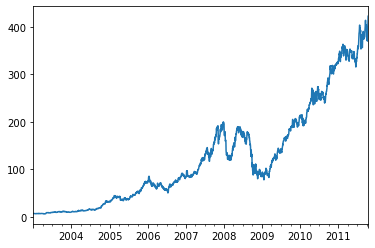

In [18]:
close_px.AAPL.plot()

<AxesSubplot:>

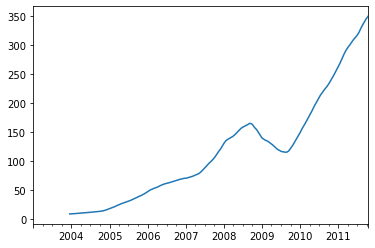

In [19]:
close_px.AAPL.rolling(250).mean().plot()

In [22]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot:>

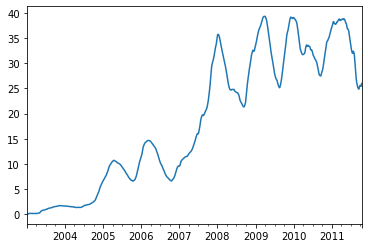

In [23]:
appl_std250.plot()

<AxesSubplot:>

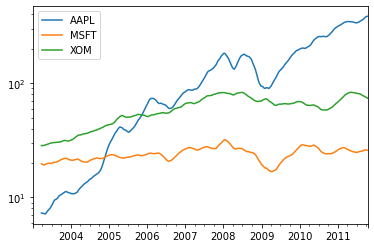

In [24]:
close_px.rolling(60).mean().plot(logy=True)

In [25]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


In [32]:
import matplotlib.pyplot as plt

### exponentially weighted functions 

In [26]:
aapl_px = close_px.AAPL['2006':'2007']

In [27]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()

In [28]:
ewma60 = aapl_px.ewm(span=30).mean()

<AxesSubplot:>

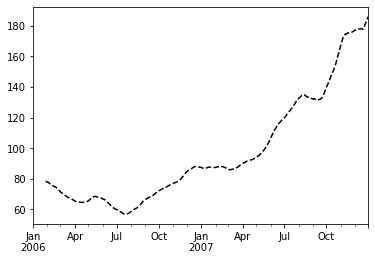

In [29]:
ma60.plot(style='k--', label='Simple MA')

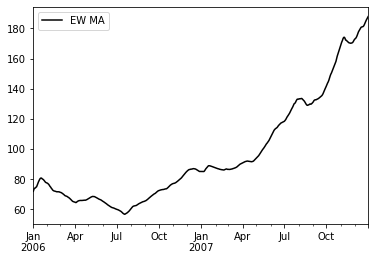

In [33]:
ewma60.plot(style='k-', label='EW MA')
plt.legend()

In [34]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

<AxesSubplot:>

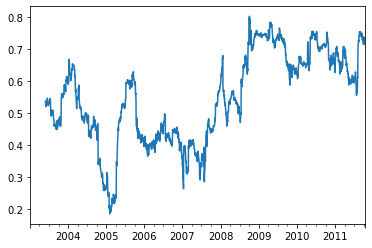

In [35]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<AxesSubplot:>

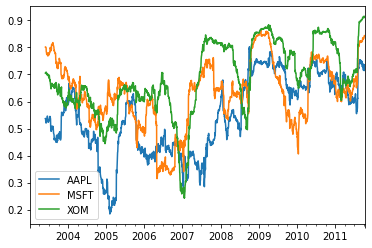

In [36]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()